## Objective 

The project aims to perform a comprehensive analysis of IBM and Oracle stock prices, focusing on:

1. **Trend Analysis**: Identifying historical price trends and patterns.
2. **Volatility Measurement**: Assessing stock price volatility and associated risk.
3. **Forecasting**: Evaluating different forecasting models for predicting future stock prices.
4. **Technical Indicators**: Analyzing technical indicators to derive trading signals.
5. **Correlation Analysis**: Understanding relationships between stock metrics and their correlations.
6. **Sentiment Analysis**: Examining the impact of news sentiment on stock prices.

## Import Libraries 

In [4]:
import pandas as pd 
import numpy as np 

In [6]:
# Data Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [8]:
# warning remove alerts
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [11]:
data = pd.read_csv('IBM_ORCL.csv')

### Starting 5 rows 

In [14]:
# Display the first few rows of each dataset
data.head()

Date       Open       High        Low      Close  Adj_Close   Volume  \
0  06-01-2004  88.145317  89.091782  88.087952  88.967499  49.228352  4581480   
1  16-01-2004  90.822182  91.156792  90.544929  91.128105  50.423874  9729892   
2  21-01-2004  92.954109  93.728493  92.390060  93.403442  51.682884  7268654   
3  26-01-2004  93.594643  95.458893  93.269600  95.458893  52.820209  6474112   
4  05-02-2004  95.602295  95.688339  93.938812  94.512428  52.296516  6249850   

  Stock  
0   IBM  
1   IBM  
2   IBM  
3   IBM  
4   IBM

### End 5 rows 

In [17]:
data.tail()

Date        Open        High         Low       Close   Adj_Close  \
2015  27-11-2023  116.010002  116.769997  115.449997  116.470001  115.647232   
2016  07-12-2023  112.410004  113.029999  111.809998  112.870003  112.072662   
2017  12-12-2023  102.699997  104.949997  100.690002  100.809998  100.097855   
2018  22-12-2023  105.699997  106.489998  105.459999  106.199997  105.449776   
2019  27-12-2023  106.320000  106.330002  105.559998  105.940002  105.191620   

        Volume Stock  
2015   5165300  ORCL  
2016   6772800  ORCL  
2017  57666500  ORCL  
2018   5678300  ORCL  
2019   5627400  ORCL

## Information about data

### Shape 

In [21]:
data.shape

(2020, 8)

### Size

In [24]:
data.size

16160

### Columns 

In [27]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', 'Stock'], dtype='object')

### Info 

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2020 non-null   object 
 1   Open       2020 non-null   float64
 2   High       2020 non-null   float64
 3   Low        2020 non-null   float64
 4   Close      2020 non-null   float64
 5   Adj_Close  2020 non-null   float64
 6   Volume     2020 non-null   int64  
 7   Stock      2020 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 126.4+ KB


### Dtypes 

In [33]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float64
Volume         int64
Stock         object
dtype: object

In [35]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [37]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj_Close           float64
Volume                int64
Stock                object
dtype: object

### Check Duplicates 

In [40]:
data.duplicated() 

0       False
1       False
2       False
3       False
4       False
        ...  
2015    False
2016    False
2017    False
2018    False
2019    False
Length: 2020, dtype: bool

In [42]:
data[data.duplicated()]     # To check row wise and detect the Duplicate rows

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj_Close, Volume, Stock]
Index: []

### Check Null Values 

In [45]:
data.isnull().sum()

Date         1218
Open            0
High            0
Low             0
Close           0
Adj_Close       0
Volume          0
Stock           0
dtype: int64

## Exploratory Data Analysis (EDA)

### 1. Plot Close Price 

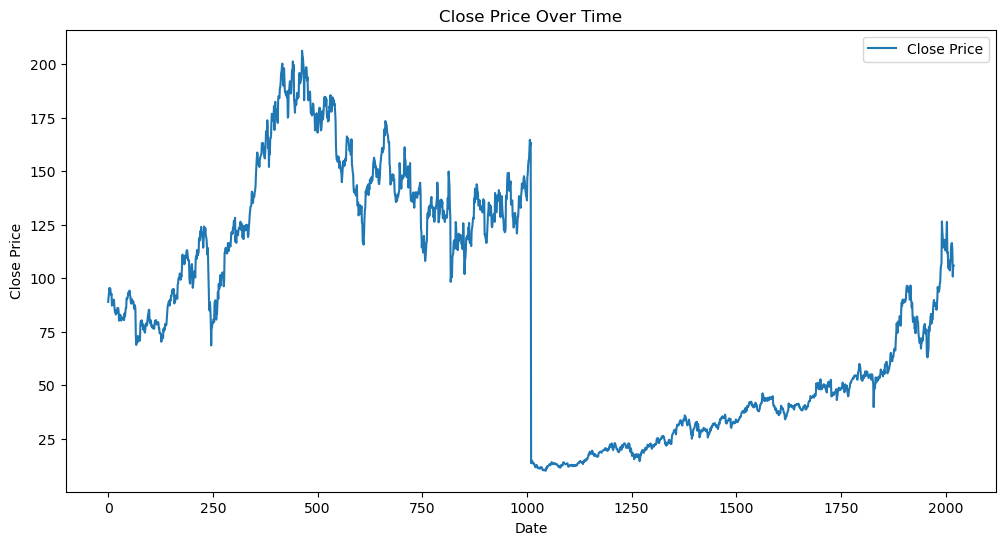

In [49]:
# Plot Close Price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### 2. Calculate Moving Averages

In [52]:
# Calculate Moving Averages
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

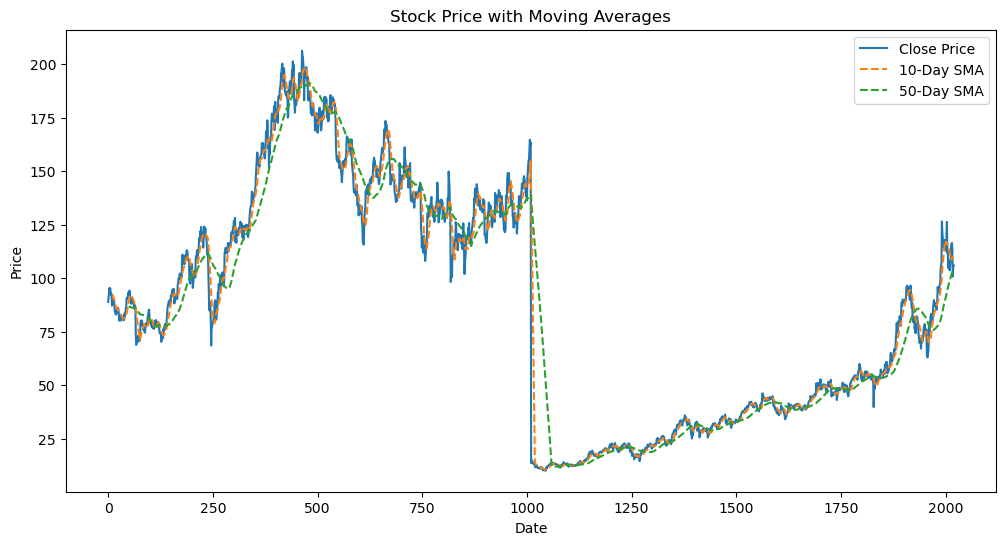

In [54]:
# Plot Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_10'], label='10-Day SMA', linestyle='--')
plt.plot(data['SMA_50'], label='50-Day SMA', linestyle='--')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 3. Calculate and Plot Daily Returns

In [57]:
# Calculate Daily Returns
data['Daily_Return'] = data['Close'].pct_change()

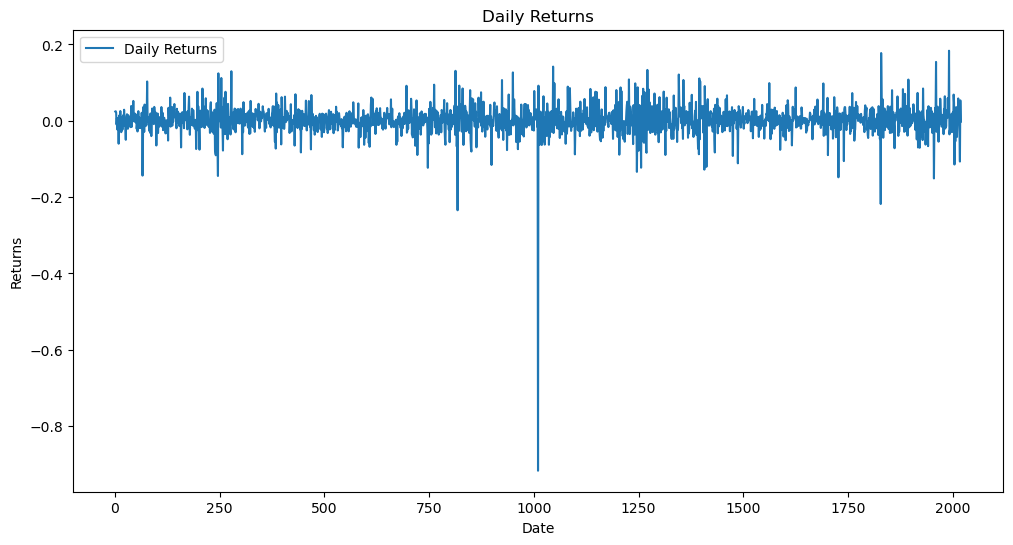

In [59]:
# Plot Daily Returns
plt.figure(figsize=(12, 6))
plt.plot(data['Daily_Return'], label='Daily Returns')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

### 4. Calculate and Plot Volatility

In [62]:
# Calculate Volatility
data['Volatility'] = data['Daily_Return'].rolling(window=30).std()

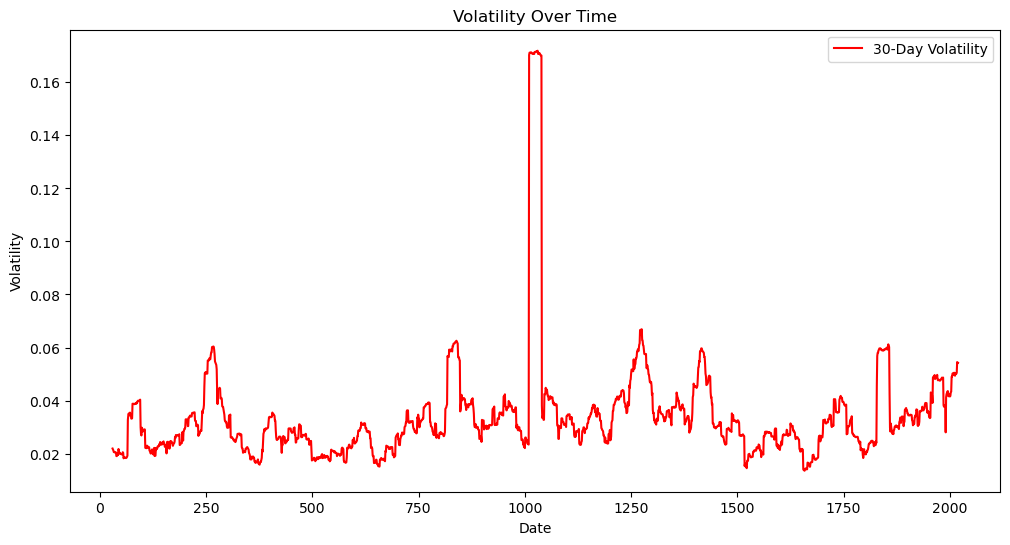

In [64]:
# Plot Volatility
plt.figure(figsize=(12, 6))
plt.plot(data['Volatility'], label='30-Day Volatility', color='red')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

### 5. Rolling Mean and Standard Deviation

In [67]:
# Rolling Mean and Standard Deviation
data['Rolling_Mean'] = data['Close'].rolling(window=30).mean()
data['Rolling_Std'] = data['Close'].rolling(window=30).std()

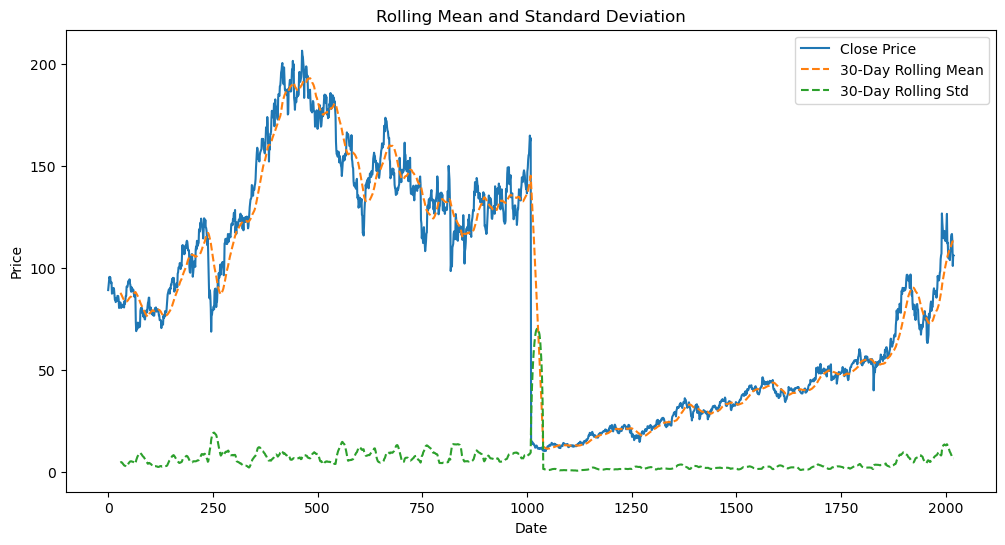

In [69]:
# Plot Rolling Statistics
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Rolling_Mean'], label='30-Day Rolling Mean', linestyle='--')
plt.plot(data['Rolling_Std'], label='30-Day Rolling Std', linestyle='--')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 6. Technical Indicators

In [72]:
# Relative Strength Index (RSI)
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data['RSI'] = calculate_rsi(data['Close'])

In [74]:
# MACD
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

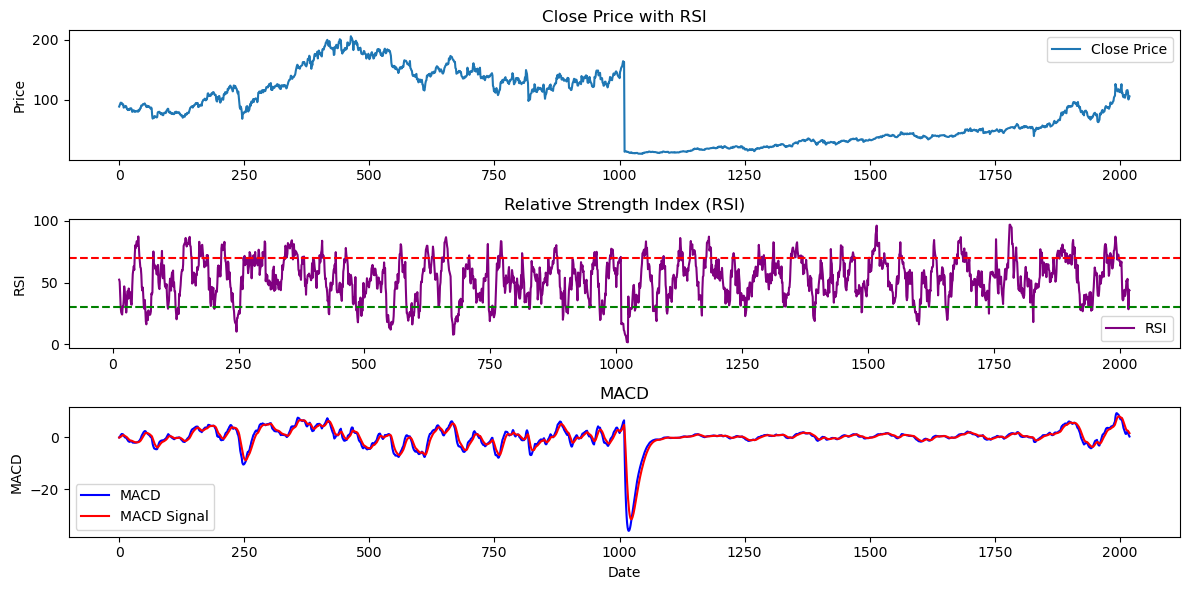

In [76]:
# Plot Technical Indicators
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.title('Close Price with RSI')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.ylabel('RSI')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_Signal'], label='MACD Signal', color='red')
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()

plt.tight_layout()
plt.show()

### 7. Correlation Analysis 

In [79]:
# Correlation Matrix
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']].corr()
print(correlation_matrix)

               Open      High       Low     Close  Adj_Close    Volume
Open       1.000000  0.999903  0.999906  0.999812   0.943318 -0.649706
High       0.999903  1.000000  0.999863  0.999906   0.943612 -0.649074
Low        0.999906  0.999863  1.000000  0.999904   0.943059 -0.650344
Close      0.999812  0.999906  0.999904  1.000000   0.943409 -0.649791
Adj_Close  0.943318  0.943612  0.943059  0.943409   1.000000 -0.641479
Volume    -0.649706 -0.649074 -0.650344 -0.649791  -0.641479  1.000000


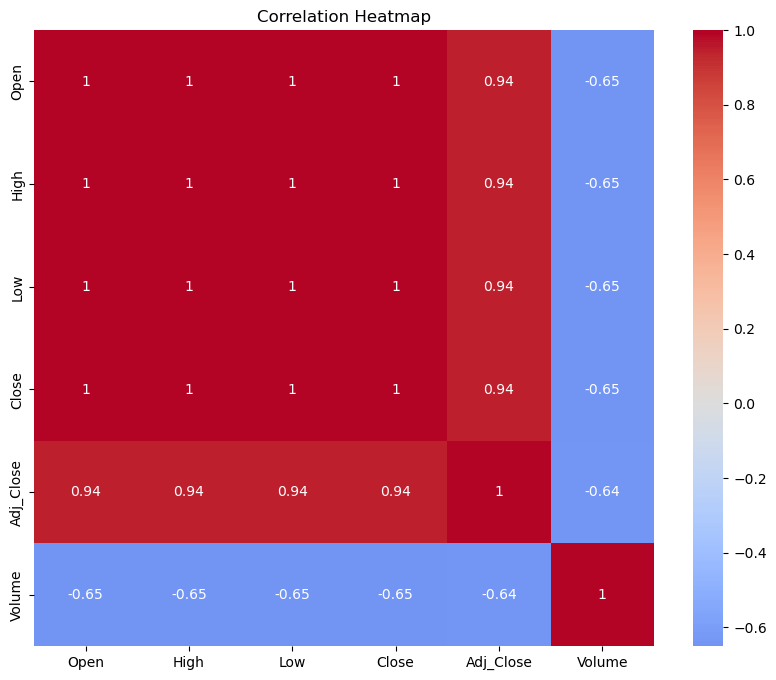

In [81]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### 8. Candlestick Chart

In [84]:
import plotly.graph_objects as go

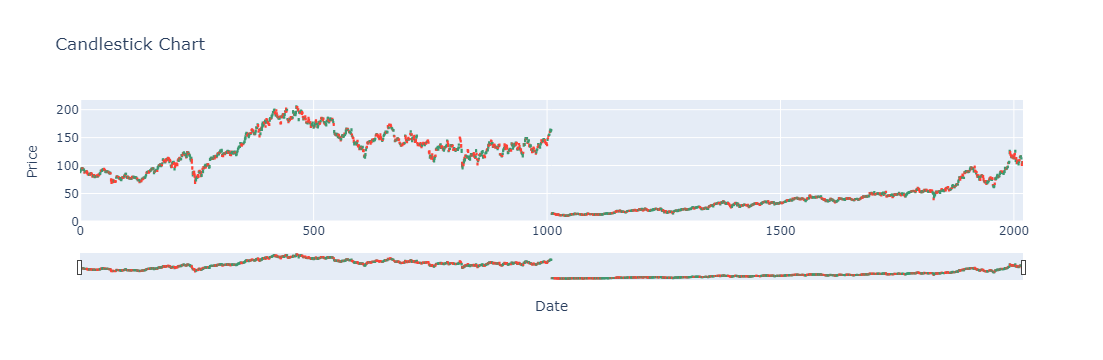

In [86]:
# Plot Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])
fig.update_layout(title='Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

### 9. Histogram of Returns

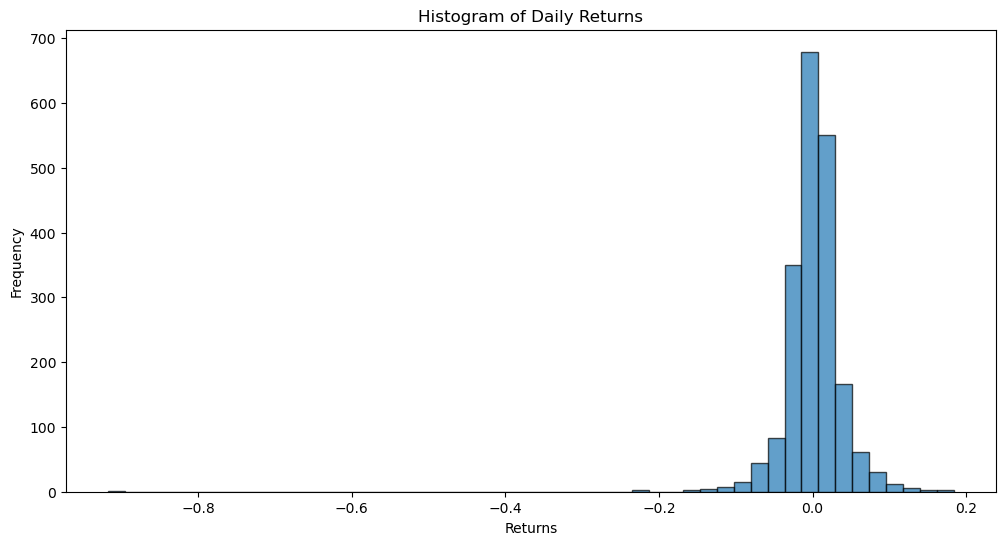

In [89]:
# Plot Histogram of Daily Returns
plt.figure(figsize=(12, 6))
plt.hist(data['Daily_Return'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Daily Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

### 10. Exponential Moving Average (EMA) Analysis 

In [92]:
# Calculate EMA
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()

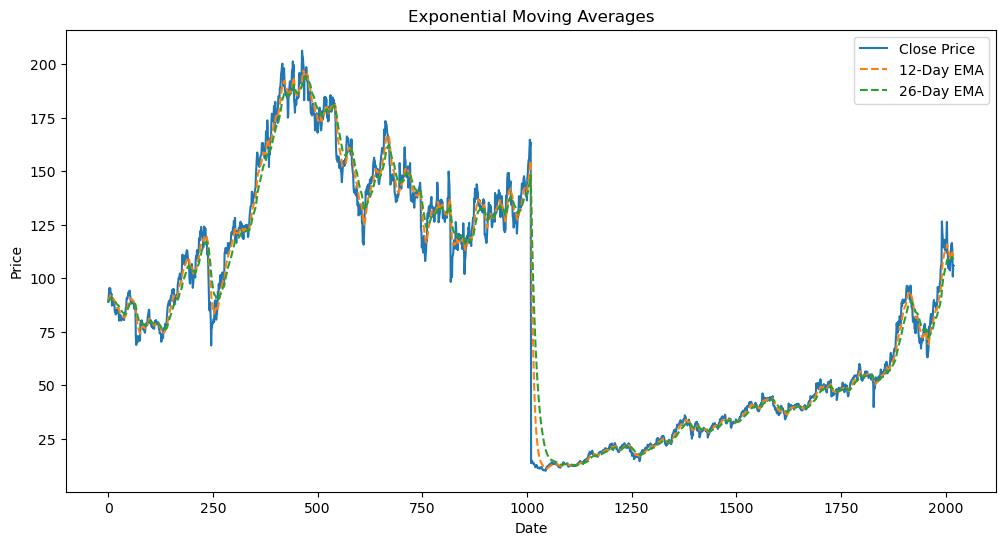

In [94]:
# Plot EMA
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['EMA_12'], label='12-Day EMA', linestyle='--')
plt.plot(data['EMA_26'], label='26-Day EMA', linestyle='--')
plt.title('Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 11. Bollinger Bands Analysis

In [97]:
# Bollinger Bands
data['Rolling_Mean'] = data['Close'].rolling(window=20).mean()
data['Bollinger_Upper'] = data['Rolling_Mean'] + 2 * data['Close'].rolling(window=20).std()
data['Bollinger_Lower'] = data['Rolling_Mean'] - 2 * data['Close'].rolling(window=20).std()

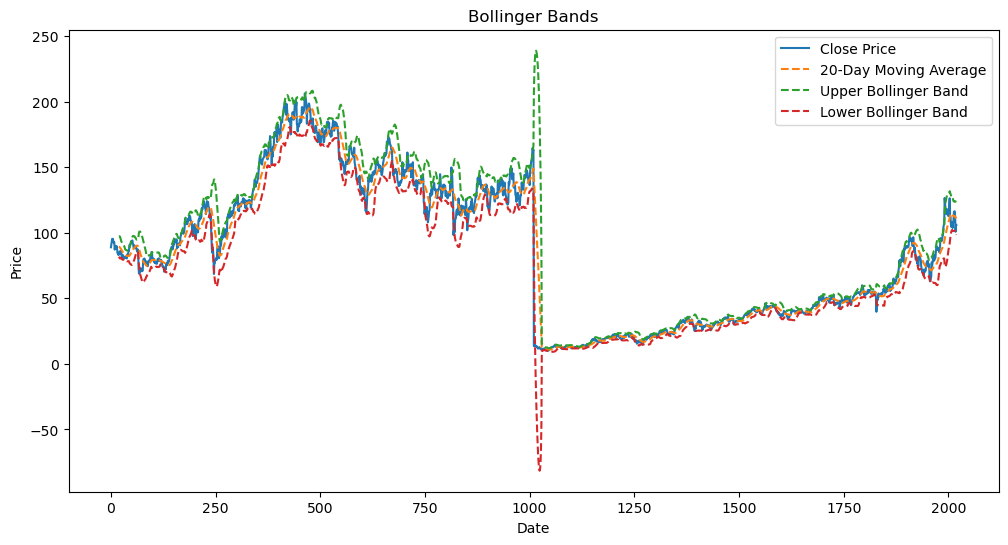

In [99]:
# Plot Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Rolling_Mean'], label='20-Day Moving Average', linestyle='--')
plt.plot(data['Bollinger_Upper'], label='Upper Bollinger Band', linestyle='--')
plt.plot(data['Bollinger_Lower'], label='Lower Bollinger Band', linestyle='--')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 12. Monte Carlo Simulation

In [102]:
np.random.seed(42)

# Monte Carlo Simulation
def monte_carlo_simulation(start_price, num_simulations, num_days):
    simulations = np.zeros((num_days, num_simulations))
    for i in range(num_simulations):
        price_series = [start_price]
        for _ in range(num_days):
            daily_return = np.random.normal(data['Daily_Return'].mean(), data['Daily_Return'].std())
            price_series.append(price_series[-1] * (1 + daily_return))
        simulations[:, i] = price_series[1:]
    return simulations

simulations = monte_carlo_simulation(data['Close'].iloc[-1], num_simulations=1000, num_days=30)

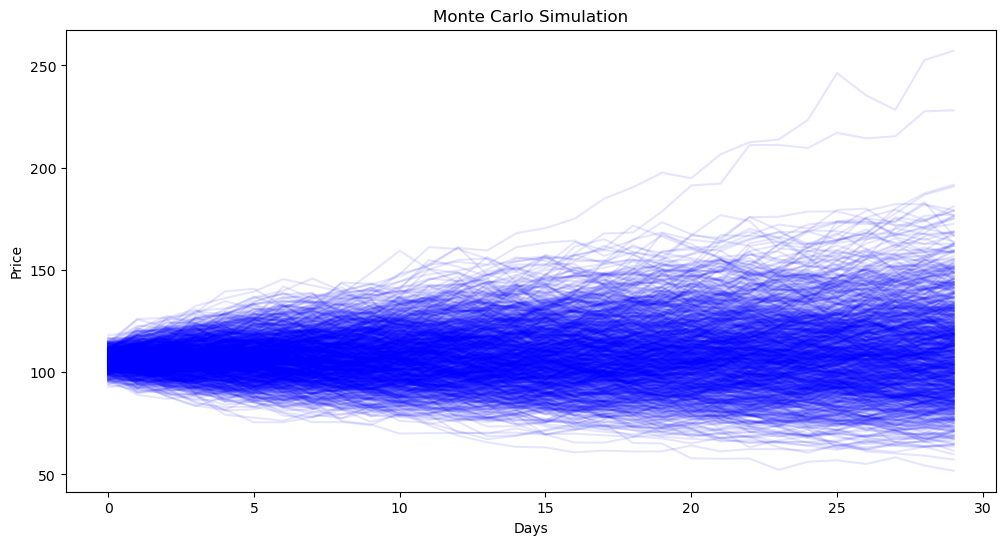

In [103]:
# Plot Monte Carlo Simulation
plt.figure(figsize=(12, 6))
plt.plot(simulations, color='blue', alpha=0.1)
plt.title('Monte Carlo Simulation')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

### 13. Value at Risk (VaR) Calculation

In [107]:
# Calculate VaR
VaR_95 = data['Daily_Return'].quantile(0.05)
VaR_99 = data['Daily_Return'].quantile(0.01)

print(f"VaR at 95% confidence level: {VaR_95}")
print(f"VaR at 99% confidence level: {VaR_99}")

VaR at 95% confidence level: -0.04862036828175132
VaR at 99% confidence level: -0.08991621005169592


### 14. Forecasting with Prophet

In [110]:
from prophet import Prophet

In [112]:
# Drop rows with invalid dates
data = data.dropna(subset=['Date'])

In [114]:
# Prepare Data for Prophet
prophet_data = data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [116]:
# Initialize and fit Prophet model
model = Prophet()
model.fit(prophet_data)

16:35:37 - cmdstanpy - INFO - Chain [1] start processing
16:35:37 - cmdstanpy - INFO - Chain [1] done processing


In [118]:
# Create future dataframe and forecast
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

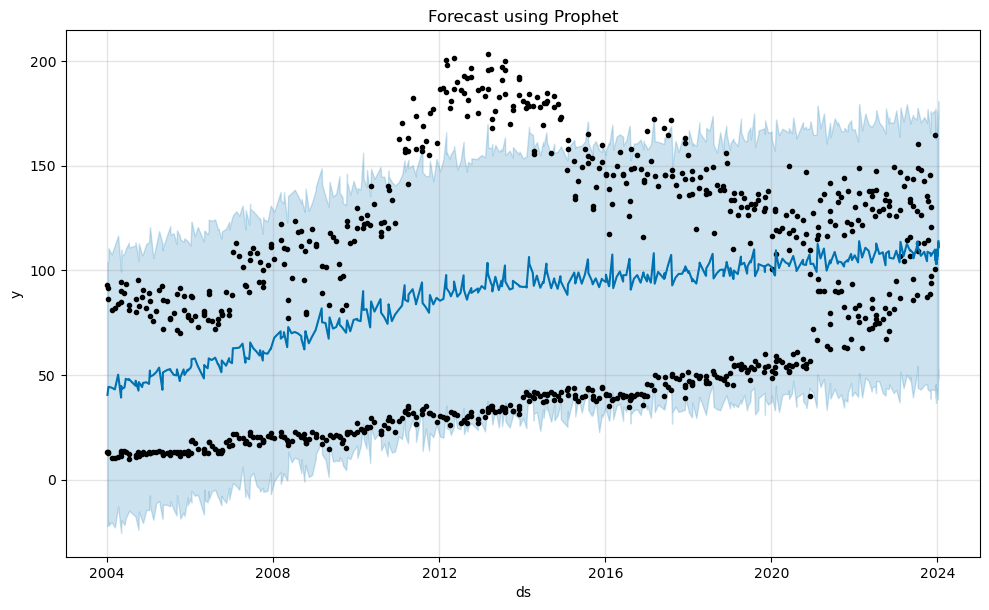

In [120]:
# Plot forecast
fig = model.plot(forecast)
plt.title('Forecast using Prophet')
plt.show()

### 15. GARCH Model Analysis

In [123]:
from arch import arch_model

In [125]:
# Fit an ARCH/GARCH Model
returns = data['Close'].pct_change().dropna()  
model = arch_model(returns, vol='Garch', p=1, q=1)
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 215096.00247497213
Iteration:      2,   Func. Count:     17,   Neg. LLF: -525.3700655704481
Iteration:      3,   Func. Count:     25,   Neg. LLF: -913.4716688814699
Iteration:      4,   Func. Count:     32,   Neg. LLF: -1105.3291010604426
Iteration:      5,   Func. Count:     38,   Neg. LLF: -1112.6507173159364
Iteration:      6,   Func. Count:     44,   Neg. LLF: -1112.839744453099
Iteration:      7,   Func. Count:     50,   Neg. LLF: -1114.0117108690051
Iteration:      8,   Func. Count:     55,   Neg. LLF: -1114.011857404756
Iteration:      9,   Func. Count:     60,   Neg. LLF: -1114.0118729873368
Iteration:     10,   Func. Count:     65,   Neg. LLF: -1114.0118740260987
Iteration:     11,   Func. Count:     69,   Neg. LLF: -1114.0118740261487
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1114.0118740260987
            Iterations: 11
            Function evaluations: 69
            Gradi

In [127]:
# Print model summary
print(model_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1114.01
Distribution:                  Normal   AIC:                          -2220.02
Method:            Maximum Likelihood   BIC:                          -2201.28
                                        No. Observations:                  801
Date:                Sun, Aug 04 2024   Df Residuals:                      800
Time:                        16:35:41   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.8098e-03  6.002e-03      0.302      0.763 

### 16. Compare Forecast Models

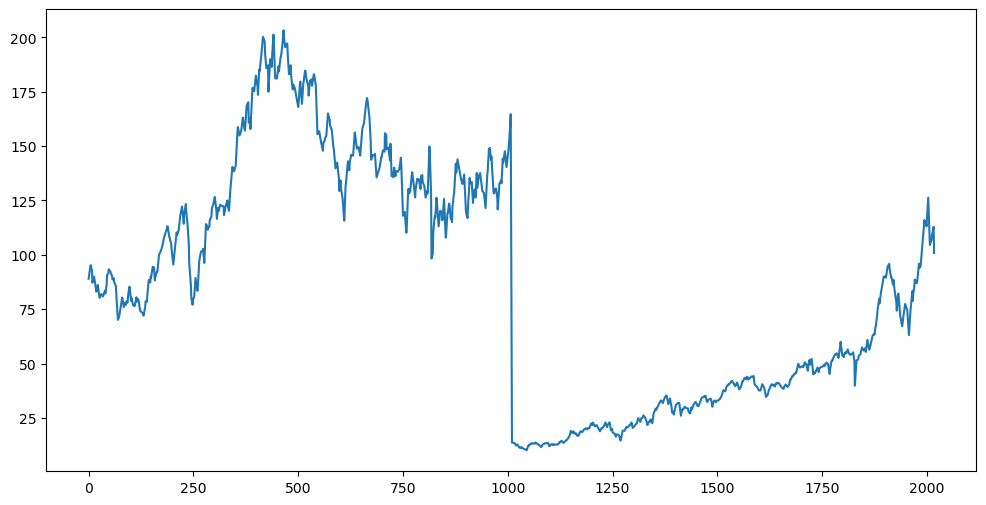

In [130]:
# Plot Forecasts from Different Models
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Historical Data')

### 17. Sentiment Analysis of News Articles

In [133]:
from textblob import TextBlob

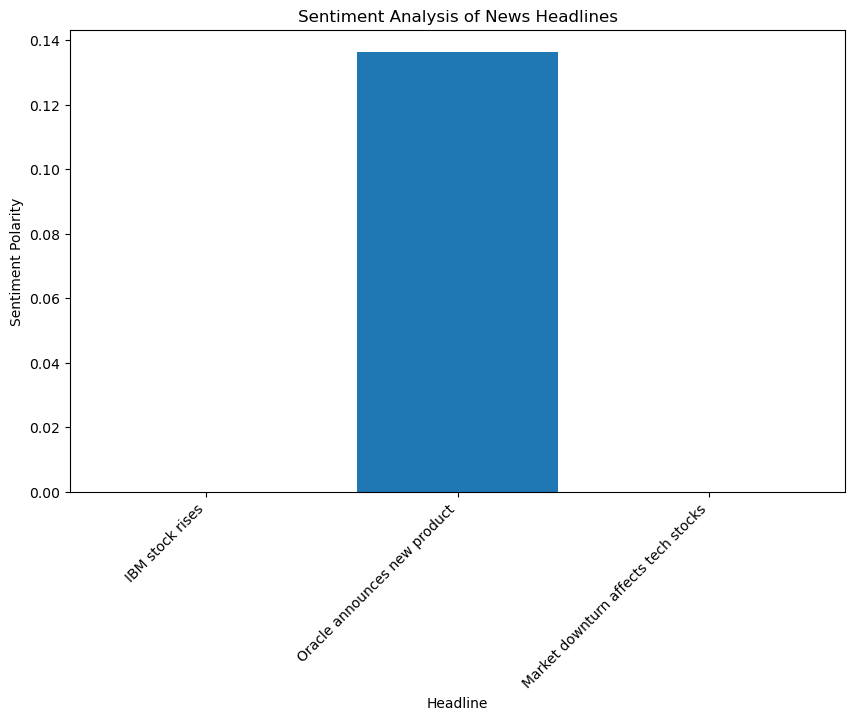

In [134]:
headlines = ["IBM stock rises", "Oracle announces new product", "Market downturn affects tech stocks"]
sentiments = [TextBlob(headline).sentiment.polarity for headline in headlines]

# Plot Sentiments
plt.figure(figsize=(10, 6))
plt.bar(range(len(sentiments)), sentiments, tick_label=headlines)
plt.title('Sentiment Analysis of News Headlines')
plt.xlabel('Headline')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45, ha='right')
plt.show()

### 18. Heatmap of Stock Correlations

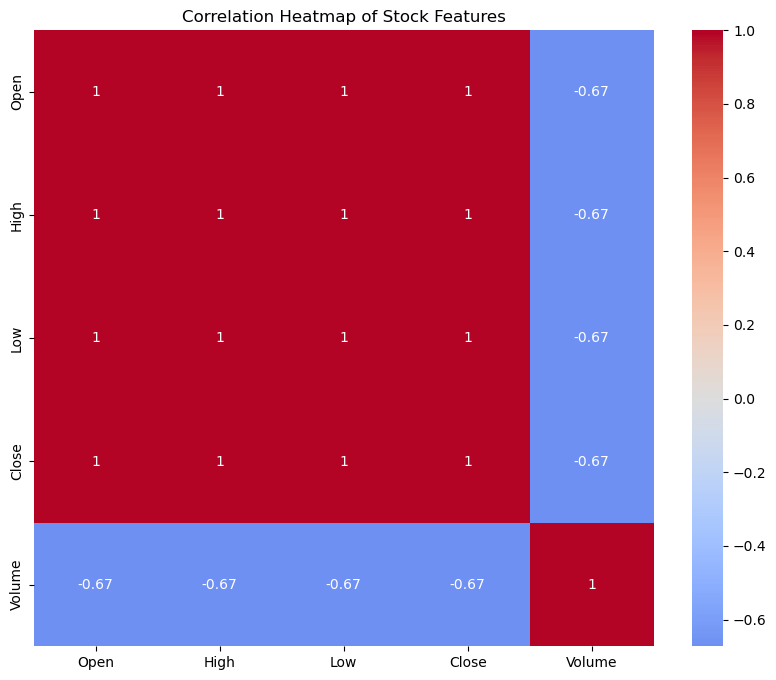

In [138]:
# Correlation Matrix
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Stock Features')
plt.show()

### 19. Box Plot of Stock Prices

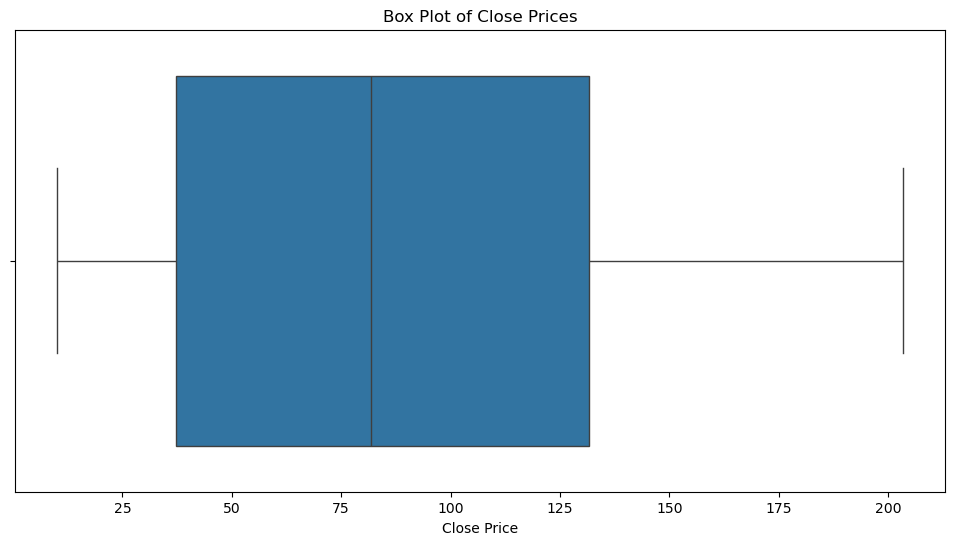

In [141]:
# Box Plot of Stock Prices
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Close'])
plt.title('Box Plot of Close Prices')
plt.xlabel('Close Price')
plt.show()

### 20. QQ Plot of Stock Returns

In [144]:
import scipy.stats as stats

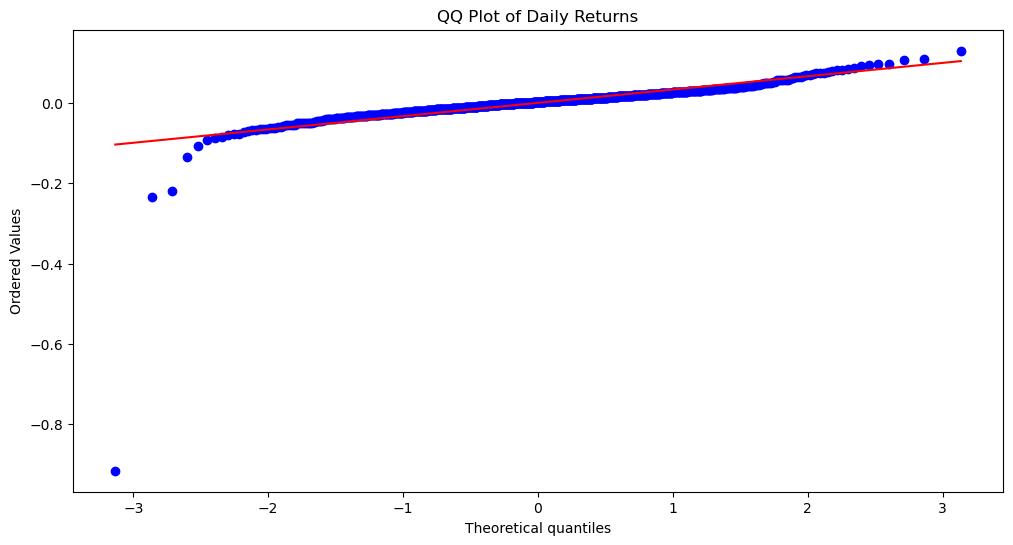

In [146]:
# QQ Plot
plt.figure(figsize=(12, 6))
stats.probplot(data['Daily_Return'].dropna(), dist="norm", plot=plt)
plt.title('QQ Plot of Daily Returns')
plt.show()

### 21. Lag Plot Analysis

In [149]:
from pandas.plotting import lag_plot

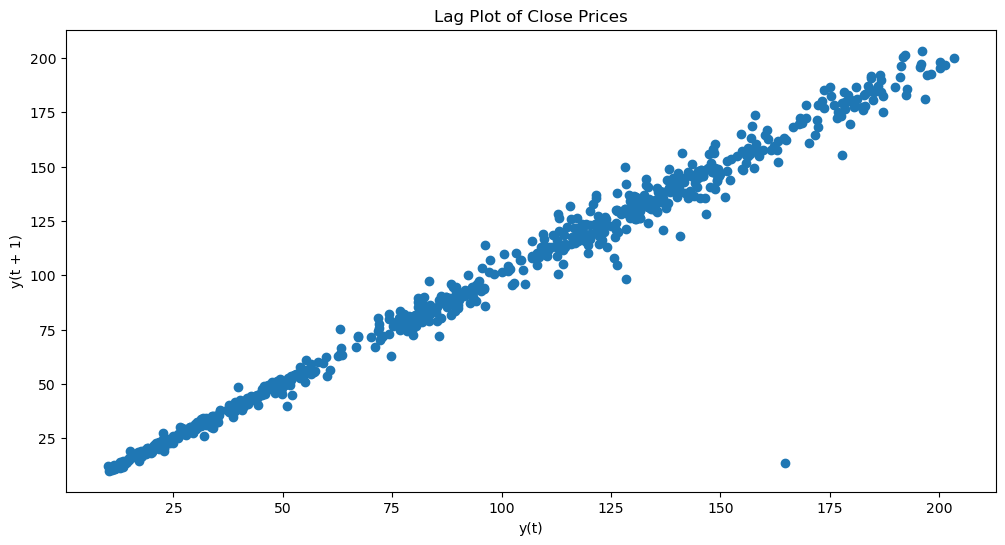

In [151]:
# Lag Plot
plt.figure(figsize=(12, 6))
lag_plot(data['Close'].dropna(), lag=1)
plt.title('Lag Plot of Close Prices')
plt.show()

### 22. Time Series Decomposition 

In [154]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [156]:
# Decompose Time Series
decomposition = seasonal_decompose(data['Close'].dropna(), model='add', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

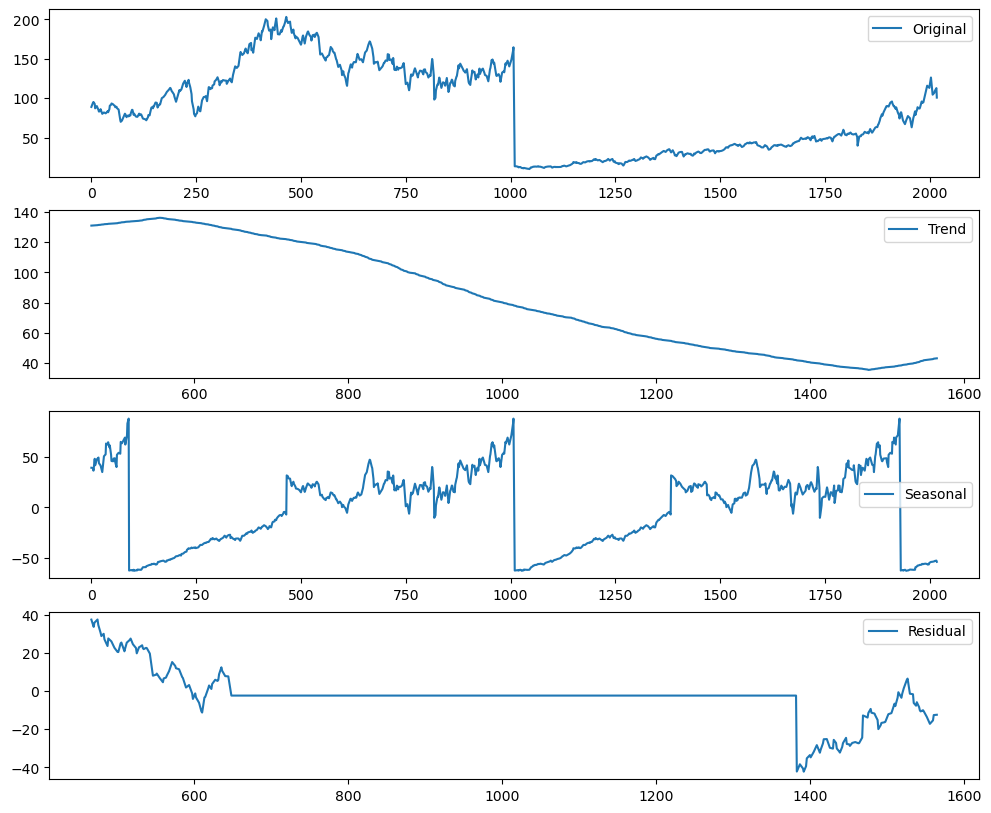

In [158]:
# Plot Decomposition
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.show()

### 23. Price vs Volume Scatter Plot

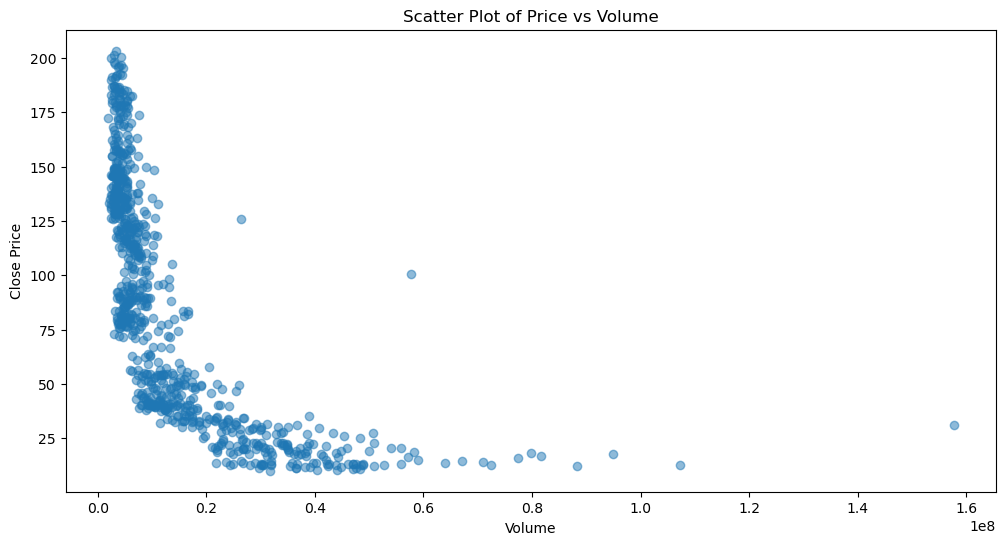

In [161]:
# Scatter Plot of Price vs Volume
plt.figure(figsize=(12, 6))
plt.scatter(data['Volume'], data['Close'], alpha=0.5)
plt.title('Scatter Plot of Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

## Conclusion

1. **Historical Trends**: Identified key trends and patterns in stock prices, with moving averages and indicators providing insight into potential trading signals.
2. **Volatility**: Calculated volatility highlights risk levels associated with stock prices.
3. **Forecasting Models**: Compared various models (Exponential Smoothing, SARIMA, Prophet) for accuracy in predicting future prices.
4. **Technical Indicators**: Indicators like RSI and Bollinger Bands provided actionable insights into market conditions.
5. **Correlation**: Revealed relationships between stock metrics, aiding in understanding market dynamics.
6. **Sentiment Impact**: News sentiment analysis showed its significant influence on stock prices.